In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import math
import matplotlib.pyplot as plt
import torch.nn.init as init
import time
import random
import pandas as pd

In [2]:
def np_to_torch(arr):
    
    arr = torch.FloatTensor(arr)
    arr = arr.unsqueeze(-1)
    arr = arr.clone().detach().requires_grad_(True)
    
    return arr

def xyt_train_data(N_x, x_l, x_r, N_y, y_b, y_t, N_t, t_i, t_f, N_bc):

    # start = []
    
    # ####  Spatial array
    # x_r_train = 0.3*x_r
    # y_t_train = 0.3*y_t
    # N_x_train = int(1.3*x_r_train/x_r*N_x) 
    # N_y_train = int(1.3*y_t_train/y_t*N_y) 
    
    # x_train = np.linspace(x_l, x_r_train, N_x_train)  
    # y_train = np.linspace(y_b, y_t, N_y)
    # x_train = np.repeat(x_train, N_y)
    # y_train = np.tile(y_train, N_x_train)
    # x_train1 = np.linspace(x_r_train, x_r, N_x-N_x_train)  
    # y_train1 = np.linspace(y_b+0.001, y_t_train, N_y-N_y_train)
    # x_train1 = np.repeat(x_train1, N_y-N_y_train)
    # y_train1 = np.tile(y_train1, N_x-N_x_train)
    # x_train = np.concatenate((x_train, x_train1), axis = 0)
    # y_train = np.concatenate((y_train, y_train1), axis = 0)
    # n = x_train.shape[0]
    
    # x_train = np.tile(x_train, N_t)
    # y_train = np.tile(y_train, N_t)
    # t_train = np.linspace(t_i, t_f, N_t)
    # t_train = np.repeat(t_train, n )
    
    # start.append( 0 )
    # start.append( t_train.shape[0] ) 
    # print('n = ', n)
    # print('training data-size = ', t_train.shape[0] )
    
    # # Boundary collocation points
    # x_bc1 = np.ones((N_bc))*x_l
    # y_bc1 = np.linspace(y_b, y_t, N_bc)
    # t_bc1 = np.linspace(t_i+0.005,t_f,N_t)
    # x_bc1 = np.tile(x_bc1, N_t)
    # y_bc1 = np.tile(y_bc1, N_t)
    # t_bc1 = np.repeat(t_bc1, N_bc)
    
    # start.append( start[-1] + t_bc1.shape[0] )
    
    # x_bc2 = np.ones((N_bc))*x_r
    # y_bc2 = np.linspace(y_b+0.001,y_t,N_bc)
    # t_bc2 = np.linspace(t_i+0.005,t_f,N_t)
    # x_bc2 = np.tile(x_bc2, N_t)
    # y_bc2 = np.tile(y_bc2, N_t)
    # t_bc2 = np.repeat(t_bc2, N_bc)
    
    # start.append( start[-1] + t_bc2.shape[0] )
    
    # x_bc3 = np.linspace(x_l,x_r,N_bc)
    # y_bc3 = np.ones((N_bc))*y_b
    # t_bc3 = np.linspace(t_i+0.005,t_f,N_t)
    # x_bc3 = np.tile(x_bc3, N_t)
    # y_bc3 = np.tile(y_bc3, N_t)
    # t_bc3 = np.repeat(t_bc3, N_bc)
    
    # start.append( start[-1] + t_bc3.shape[0] )
    
    # x_bc4 = np.linspace(x_l+0.001,x_r,N_bc)
    # y_bc4 = np.ones((N_bc))*y_t
    # t_bc4 = np.linspace(t_i+0.005,t_f,N_t)
    # x_bc4 = np.tile(x_bc4, N_t)
    # y_bc4 = np.tile(y_bc4, N_t)
    # t_bc4 = np.repeat(t_bc4, N_bc)
    
    # start.append( start[-1] + t_bc4.shape[0] )
    
    # # np to torch
    
    # x_T = np.concatenate((x_train, x_bc1, x_bc2, x_bc3, x_bc4), axis = 0)
    # y_T = np.concatenate((y_train, y_bc1, y_bc2, y_bc3, y_bc4), axis = 0)
    # t_T = np.concatenate((t_train, t_bc1, t_bc2, t_bc3, t_bc4), axis = 0)
    
    # x_T = np_to_torch(x_T)
    # y_T = np_to_torch(y_T)
    # t_T = np_to_torch(t_T)

    start = []
    
    ####  Spatial array
    x_r_train = 1*x_r
    y_t_train = 1*y_t
    N_x_train = int(x_r_train/x_r*N_x) 
    N_y_train = int(y_t_train/y_t*N_y) 
    
    x_train = np.linspace(x_l, x_r_train, N_x_train)  
    y_train = np.linspace(y_b, y_t, N_y)
    x_train = np.repeat(x_train, N_y)
    y_train = np.tile(y_train, N_x_train)
    
    n = x_train.shape[0]
    x_train = np.tile(x_train, N_t)
    y_train = np.tile(y_train, N_t)
    t_train = np.linspace(t_i, t_f, N_t)
    t_train = np.repeat(t_train, n )
    
    start.append( 0 )
    start.append( t_train.shape[0] ) 
    print('n = ', n)
    print('training data-size = ', t_train.shape[0] )
    
    # Boundary collocation points
    x_bc1 = np.ones((N_bc))*x_l
    y_bc1 = np.linspace(y_b, y_t, N_bc)
    t_bc1 = np.linspace(t_i+0.005,t_f,N_t)
    x_bc1 = np.tile(x_bc1, N_t)
    y_bc1 = np.tile(y_bc1, N_t)
    t_bc1 = np.repeat(t_bc1, N_bc)
    
    start.append( start[-1] + t_bc1.shape[0] )
    
    x_bc2 = np.ones((N_bc))*x_r
    y_bc2 = np.linspace(y_b+0.001,y_t,N_bc)
    t_bc2 = np.linspace(t_i+0.005,t_f,N_t)
    x_bc2 = np.tile(x_bc2, N_t)
    y_bc2 = np.tile(y_bc2, N_t)
    t_bc2 = np.repeat(t_bc2, N_bc)
    
    start.append( start[-1] + t_bc2.shape[0] )
    
    x_bc3 = np.linspace(x_l,x_r,N_bc)
    y_bc3 = np.ones((N_bc))*y_b
    t_bc3 = np.linspace(t_i+0.005,t_f,N_t)
    x_bc3 = np.tile(x_bc3, N_t)
    y_bc3 = np.tile(y_bc3, N_t)
    t_bc3 = np.repeat(t_bc3, N_bc)
    
    start.append( start[-1] + t_bc3.shape[0] )
    
    x_bc4 = np.linspace(x_l+0.001,x_r,N_bc)
    y_bc4 = np.ones((N_bc))*y_t
    t_bc4 = np.linspace(t_i+0.005,t_f,N_t)
    x_bc4 = np.tile(x_bc4, N_t)
    y_bc4 = np.tile(y_bc4, N_t)
    t_bc4 = np.repeat(t_bc4, N_bc)
    
    start.append( start[-1] + t_bc4.shape[0] )
    
    # np to torch
    
    x_T = np.concatenate((x_train, x_bc1, x_bc2, x_bc3, x_bc4), axis = 0)
    y_T = np.concatenate((y_train, y_bc1, y_bc2, y_bc3, y_bc4), axis = 0)
    t_T = np.concatenate((t_train, t_bc1, t_bc2, t_bc3, t_bc4), axis = 0)
    
    x_T = np_to_torch(x_T)
    y_T = np_to_torch(y_T)
    t_T = np_to_torch(t_T)
    
    return x_T, y_T, t_T, start, n

class RBF(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        y = 1.2*torch.exp(-5*torch.square(x)) - 0.1
        return y

class Sigm(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        y = 1/( 1 + torch.exp(-80*x) )
        return y

def xavier_init(m):
    if isinstance(m, nn.Linear):
        init.xavier_normal_(m.weight)
        init.xavier_normal_(m.bias)
        # if m.bias is not None:
        #     init.constant_(m.bias, 0.01)
    
class ANN(nn.Module):
    def __init__(self, layer_size_1, layer_size_2):
        super(ANN, self).__init__()

        rbf = RBF()
        tanh = nn.Tanh()
        sigmoid = nn.Sigmoid()
        self.act = rbf
        mean_init = 0
        std_init = 0.707
        
        ########### Fully conected model-1 ###########
        
        modules_11 = []
        modules_11.append(nn.Linear(layer_size_1[0], layer_size_1[1]))  
        modules_11.append(self.act)
        modules_11.append(nn.Linear(layer_size_1[1], layer_size_1[2]))  
        self.fc_11 = nn.Sequential( *modules_11 )

        # for layer in [self.fc_11.modules()]:
        #     if isinstance(layer, nn.Linear):
        #         xavier_init(layer)
                
        modules_12 = []
        modules_12.append(nn.Linear(layer_size_1[1], layer_size_1[2])) 
        modules_12.append(self.act)
        modules_12.append(nn.Linear(layer_size_1[1], layer_size_1[2])) 
        modules_12.append(self.act)
        self.fc_12 = nn.Sequential( *modules_12 )
        
        modules_13 = []
        modules_13.append(nn.Linear(layer_size_1[2], layer_size_1[3])) 
        self.fc_13 = nn.Sequential( *modules_13 )

        for layer in [self.fc_11.modules(), self.fc_12.modules(), self.fc_13.modules()]:
            if isinstance(layer, nn.Linear):
                xavier_init(layer)

    def forward(self, x_T, y_T, t_T, start, result, pr):

        ########### Fully conected model-1 ###########
        out_1 = self.fc_11( torch.cat((x_T, y_T, t_T),1) )
        out_2 = self.fc_12( out_1 )
#         T = self.fc_13( out_1 + out_2 )
        T = self.fc_13( out_2 )
        
        dTdx = torch.autograd.grad(T, x_T, grad_outputs=torch.ones_like(T), create_graph=True)[0]
        d2Tdx2 = torch.autograd.grad(dTdx, x_T, grad_outputs=torch.ones_like(dTdx), create_graph=True)[0]
        dTdy = torch.autograd.grad(T, y_T, grad_outputs=torch.ones_like(T), create_graph=True)[0]
        d2Tdy2 = torch.autograd.grad(dTdy, y_T, grad_outputs=torch.ones_like(dTdy), create_graph=True)[0]
        dTdt = torch.autograd.grad(T, t_T, grad_outputs=torch.ones_like(T), create_graph=True)[0]

        ### matrix for interface boundary condition ###
        # m1 = torch.where(T >= 0.2, 1, 0)
        # Ns1 = torch.sum(m1) + 1
        m1 = 1
        Ns1 = 1
        
        m2 = 1 - m1
        Ns2 = 1

        return  T, dTdx, dTdy, d2Tdx2, d2Tdy2, dTdt, m1, Ns1, m2, Ns2
    
def get_loss(x_T, y_T, t_T, start, k1, k2, w1, w2, w3, w4, w5, w6, w7, q_norm, n, T_change, N_t):
 
    T, dTdx, dTdy, d2Tdx2, d2Tdy2, dTdt, m1, Ns1, m2, Ns2 = model( x_T, y_T, t_T, start, 0, 0)

    sigm = Sigm()
    tanh = nn.Tanh()
    
    # eq1 = w1*( torch.sum( torch.mul( torch.square( dTdt - k1*(d2Tdx2 + d2Tdy2)), sigm(T - T_change) ) ) 
    # + torch.sum( torch.mul( torch.square( dTdt - k2*(d2Tdx2 + d2Tdy2)), sigm(T_change - T) ) ) )/(n*N_t)

    eq1 = w1*( torch.sum( torch.mul( torch.square( dTdt - k1*(d2Tdx2 + d2Tdy2)), torch.where(T>=T_change,1,0) ) ) 
    + torch.sum( torch.mul( torch.square( dTdt - k2*(d2Tdx2 + d2Tdy2)), torch.where(T<T_change,1,0) ) ) )/(n*N_t)

    bc1 = w2*torch.sum( torch.square( dTdx[ start[1]:start[2] ] + q_norm ) )/(start[2]-start[1]) #left boundary
    bc2 = w3*torch.sum( torch.square( dTdy[ start[3]:start[4] ] + q_norm  ) )/(start[4]-start[3]) #bottom boundary
    bc3 = w4*torch.sum( torch.square( dTdy[ start[4]:start[5] ] ) )/(start[5]-start[4]) #top boundary
    bc4 = w5*torch.sum( torch.square( dTdx[ start[2]:start[3] ] ) )/(start[3]-start[2]) #right boundary

    ic1 = w6*torch.sum( torch.square( T[0:n] )  )/(n) 
    # p = w7*torch.mean( torch.square(tanh(50*T) - 1))
    
    loss = eq1 + bc1 + bc2 + bc3 + bc4 + ic1 
    
    return loss, eq1, bc1, bc2, bc3, bc4, ic1

def print_loss(epoch, loss, eq1, bc1, bc2, bc3, bc4, ic1):
    print('epoch = ',epoch)
    print('loss = ',loss.detach().numpy())
    print('eq1_loss = ',eq1.detach().numpy())
    print('bc1_loss = ',bc1.detach().numpy())
    print('bc2_loss = ',bc2.detach().numpy())
    print('bc3_loss = ',bc3.detach().numpy())
    print('bc4_loss = ',bc4.detach().numpy())
    print('ic1_loss = ',ic1.detach().numpy())

def save_model(model, path):
    torch.save(model.state_dict(), path)

def load_model(model, path):
    model.load_state_dict(torch.load(path))
    model.eval()

def freeze(model):
    for i, param in enumerate(model.parameters()):
        print("#######", i, " #######" )
        if i not in [4, 5, 10, 11]:
            param.requires_grad = False
        print(param)

In [3]:
#### Domain Dimensional Properties #####
x_l = 0
y_b = 0
x_r = 1
y_t = 1
t_i = 0

# material params:- RT-35
k_therm = 0.2
L = 160000
Cp = 2000
rho = 800 
T_solidus = 305
T_liquidus = 313

### Assumed boundary conditions ####
q = 450

#### Normalising coeffs #####
T_change = 0.35
delta_x = 0.01
delta_y = 0.01
delta_T = (T_liquidus - T_solidus)/T_change

#### k1 ###
k1 = k_therm/(rho*Cp*delta_x**2)*300

### k2 ###
k2 = k_therm/(rho*(Cp+L/(T_liquidus - T_solidus))*delta_x**2)*300

#### q_bnorm #####
q_norm = q*delta_x/(k_therm*delta_T)

print('k1 = ',k1,' k2 = ', k2, ' q_norm = ', q_norm)

# Training data and initial data
layer_size_1 = [3, 20, 20, 1]
layer_size_2 = [3, 9, 9, 1]

model = ANN(layer_size_1, layer_size_2)
print(model)
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total trainable parameters in the model:", total_trainable_params)

# Setup Loss function and Optimiser
epochs = 240001

k1 =  0.375  k2 =  0.03409090909090909  q_norm =  0.9843749999999999
ANN(
  (act): RBF()
  (fc_11): Sequential(
    (0): Linear(in_features=3, out_features=20, bias=True)
    (1): RBF()
    (2): Linear(in_features=20, out_features=20, bias=True)
  )
  (fc_12): Sequential(
    (0): Linear(in_features=20, out_features=20, bias=True)
    (1): RBF()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): RBF()
  )
  (fc_13): Sequential(
    (0): Linear(in_features=20, out_features=1, bias=True)
  )
)
Total trainable parameters in the model: 1361


In [4]:
N_x = 11
N_y = 11
N_bc = 11

# Lists for storing
loss_store = []
lr1 = 9e-5
optimiser1 = torch.optim.Adam(model.parameters(), lr=lr1)
epochs = 10000
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimiser1, T_max=epochs)

# Load model
model.train()  
# path = 'model_0.12_12neurons_0mean_0.25std.pth'
# load_model(model, path)
# freeze(model)

# Loss function weights
w1 = 1
w2 = 1
w3 = 1
w4 = 1
w5 = 1
w6 = 50
w7 = 1


# for N_t in [100, 130, 160, 190]:
#     for t_f in [0.4, 0.5, 0.6, 0.7]:
N_t = 210
t_f = 2.4
print('N_t = ', N_t)
print('t_f = ', t_f)
# Initial conditions
x_T, y_T, t_T, start, n = xyt_train_data(N_x, x_l, x_r, N_y, y_b, y_t, N_t, t_i, t_f, N_bc)

for epoch in range(epochs):        
    #Backpropogation and optimisation
    # w7 = 1 + epoch/epochs
    w7 = 1
    loss, eq1, bc1, bc2, bc3, bc4, ic1 =  get_loss(x_T, y_T, t_T, start, k1, k2, w1, w2, w3, w4, w5, w6, w7, q_norm, n, T_change, N_t)
    loss_store.append(loss.detach().numpy())
    optimiser1.zero_grad()
    loss.backward()
    optimiser1.step()
    scheduler.step()

    if epoch%1==0:
        print_loss(epoch, loss, eq1, bc1, bc2, bc3, bc4, ic1)
        print("")

N_t =  210
t_f =  2.4
n =  121
training data-size =  25410
epoch =  0
loss =  9.444082
eq1_loss =  0.0154280225
bc1_loss =  0.7714248
bc2_loss =  0.83933896
bc3_loss =  0.005234745
bc4_loss =  0.010262828
ic1_loss =  7.8023925

epoch =  1
loss =  9.000774
eq1_loss =  0.015505281
bc1_loss =  0.7741758
bc2_loss =  0.83555555
bc3_loss =  0.0050993995
bc4_loss =  0.01044307
ic1_loss =  7.359995



KeyboardInterrupt: 

In [9]:
optimiser1.param_groups[0]["lr"]

0.0003434898014344511

n =  5041
training data-size =  1214881


C:\Users\USER\AppData\Local\Temp\ipykernel_10356\2726376155.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

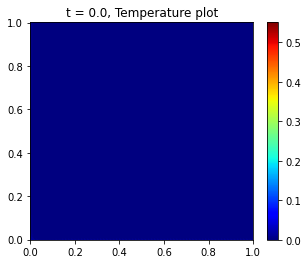

<Figure size 432x288 with 0 Axes>

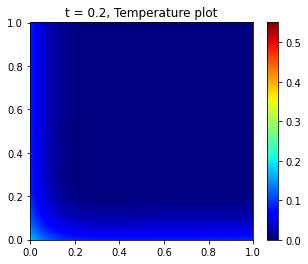

<Figure size 432x288 with 0 Axes>

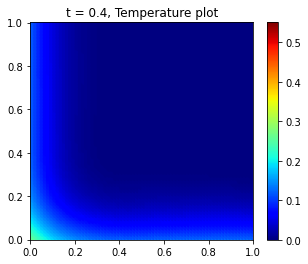

<Figure size 432x288 with 0 Axes>

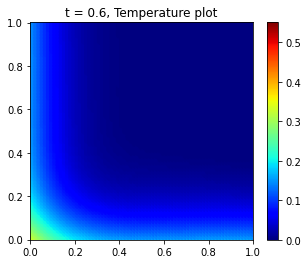

<Figure size 432x288 with 0 Axes>

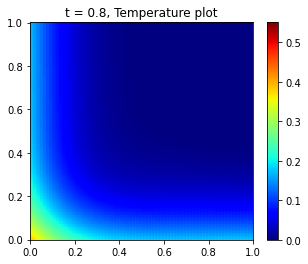

<Figure size 432x288 with 0 Axes>

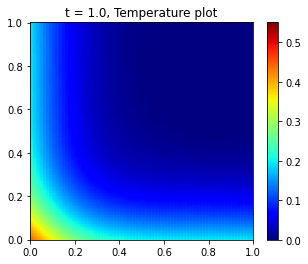

<Figure size 432x288 with 0 Axes>

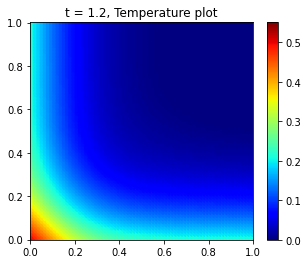

<Figure size 432x288 with 0 Axes>

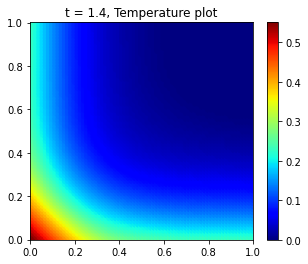

<Figure size 432x288 with 0 Axes>

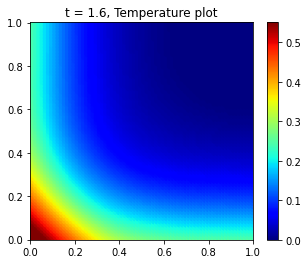

<Figure size 432x288 with 0 Axes>

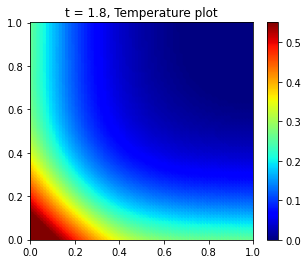

<Figure size 432x288 with 0 Axes>

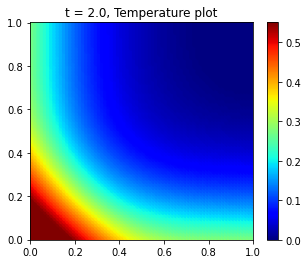

<Figure size 432x288 with 0 Axes>

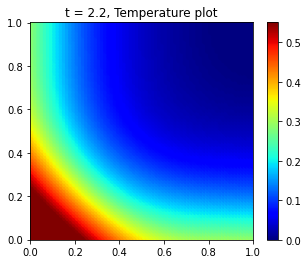

<Figure size 432x288 with 0 Axes>

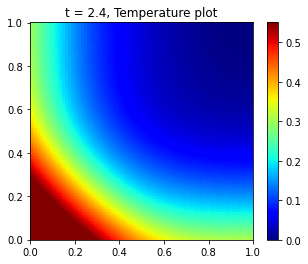

In [13]:
######################### Compute Results ###########################
N_t = int(t_f*100+1)
x_T, y_T, t_T, start, n = xyt_train_data(N_x, x_l, x_r, N_y, y_b, y_t, N_t, t_i, t_f, N_bc)
T, dTdx, dTdy, d2Tdx2, d2Tdy2, dTdt, m1, Ns1, m2, Ns2 = model( x_T, y_T, t_T, start, 0, 0)

X = x_T.detach().numpy()
Y = y_T.detach().numpy()
t = t_T.detach().numpy()
T = T.detach().numpy()

T_disp = []
F_disp = []
X_disp = []
Y_disp = []
cnt = 0

for i in range(N_t):
    x_tp = []
    y_tp = []
    T_tp = []
    F_tp = []
    for j in range(n):
        x_tp.append(X[cnt])
        y_tp.append(Y[cnt])
        T_tp.append(T[cnt])
        # if T[cnt]>=T_change:
        #     F_tp.append(1)
        # else:
        F_tp.append(T[cnt]/T_change)
            
        cnt = cnt + 1
    T_disp.append(T_tp)
    X_disp.append(x_tp)
    Y_disp.append(y_tp)
    F_disp.append(F_tp)

del_t = (t_f - t_i)/(N_t - 1)
for k in range(N_t):

    if k%20 == 0 :
        plt.figure()
        plt.figure(figsize=(5,4))
        sc = plt.scatter(X_disp[k], Y_disp[k], c=T_disp[k], cmap=plt.cm.jet)
        plt.clim(0, 0.55)
        plt.xlim(x_l-0.001, x_r+0.001)
        plt.ylim(y_b-0.001, y_t+0.001)
        plt.colorbar(sc)
        plt.title('t = '+ str( round( k*del_t, 3) )+', Temperature plot')

plt.show()

In [8]:
max(T_disp[-1])

array([0.8312517], dtype=float32)

In [16]:
#### Save the weights ####
path = 'C:/UserS/USER/Desktop/Sanjeet MTP/t5_flux450_fac300_rbfnn_20neurons_4HL_2sideflux_fulldomain.pth'
save_model(model, path)

In [5]:
import openpyxl

#### contour generation for paper ####
x_l = 0
x_r = 1
N_x = 81
y_b = 0
y_t = 1
N_y = 81

X = np.linspace(x_l,x_r,N_x)
X_np = np.tile(X,N_y)
Y = np.linspace(y_b,y_t,N_y)
Y_np = np.repeat(Y,N_x)
X = np_to_torch(X_np)
Y = np_to_torch(Y_np)
X_np = X.detach().numpy()
Y_np = Y.detach().numpy()

model.train()  
# path = 't5_flux450_fac300_rbfnn_20neurons_4HL_2sideflux_fulldomain.pth'
path = 'two_3last.pth'
load_model(model, path)
workbook = openpyxl.Workbook()

for time in [1, 1.8, 2.5]:
    
    X_new = []
    Y_new = []
    T_new = []
    
    t = np.ones((N_x*N_y))*time
    t = np_to_torch(t)
    T, dTdx, dTdy, d2Tdx2, d2Tdy2, dTdt, m1, Ns1, m2, Ns2 = model(X, Y, t, start, 0, 0)
    T = T.detach().numpy()
    
    print(T.shape[0])
    for i in range(T.shape[0]):
#         if X_np[i]>0.4 and Y_np[i]>0.4:
# #             print('boom')
#             continue
#         else:
#             print(i)
        X_new.append(X_np[i])
        Y_new.append(Y_np[i])
        T_new.append(T[i])
    cfd = np.array(pd.read_excel('2side_CFD_result.xlsx', sheet_name = 't='+str(time)))
    PINN = np.array(T_new)
    print('mse = ', ((cfd - PINN)**2).mean() )
    arr = np.concatenate((X_new, Y_new, T_new), 1)
    print(arr.shape)
    arr = arr.tolist()

    ### Save it in workbook ###
    sheet = workbook.create_sheet(title="t = "+str(time))
    sheet.append(['X', 'Y', 'T'])
    for row in arr:
        sheet.append(row)
        
# Save the workbook to the specified file
file_name = "PINN_2side_fulldomain_standardNN.xlsx"
workbook.save(file_name)
print(f"Data saved to {file_name}")

6561
mse =  0.00015308784843093057
(6561, 3)
6561
mse =  0.0006648283092932619
(6561, 3)
6561
mse =  0.0005635753674685106
(6561, 3)
Data saved to PINN_2side_fulldomain_standardNN.xlsx


In [ ]:
for k in range(N_t):

    if k%20==0:
        plt.figure()
        plt.figure(figsize=(5,4))
        sc = plt.scatter(X_disp[k], Y_disp[k], c=F_disp[k], cmap=plt.cm.jet)
        plt.clim(0,1)
        plt.xlim(x_l-0.001, x_r+0.001)
        plt.ylim(y_b-0.001, y_t+0.001)
        plt.colorbar(sc)
        plt.title('t = '+ str( round( k*del_t, 3) )+', Liquid Fraction plot')

plt.show()

In [ ]:
x_T = np.linspace(x_l, 1, N_x)
# y_T = np.linspace(x_l, 0.3, N_x)
y_T = np.ones((N_x))*0.2
t_T = np.ones((N_x))*1

x_T = np_to_torch(x_T)
y_T = np_to_torch(y_T)
t_T = np_to_torch(t_T)

T, dTdx, dTdy, d2Tdx2, d2Tdy2, dTdt, m1, Ns1, m2, Ns2 = model( x_T, y_T, t_T, start, 0, 0)
X = x_T.detach().numpy()
X = X.squeeze(-1)
Y = y_T.detach().numpy()
Y = Y.squeeze(-1)
t = t_T.detach().numpy()
t = t.squeeze(-1)
T = T.detach().numpy()
T = T.squeeze(-1)

plt.plot(X, T)

In [ ]:
df = pd.DataFrame(list(zip(X, T)), columns = ['x', 'Temperature'])
df.to_excel("PINN_2sideflux_y0.2.xlsx")

In [ ]:
# plt.scatter(x_T.detach().numpy()[:start[1]], y_T.detach().numpy()[:start[1]])

In [ ]:
u = X
u = u.squeeze(axis = 1)
u = u.reshape(N_x, N_y)
u = u.T
u = u.reshape(N_x*N_y)

v = Y
v = v.squeeze(axis = 1)
v = v.reshape(N_y, N_x)
v = v.T
v = v.reshape(N_x*N_y)

T_comp = []

for k in [21, 31, 41, 51]:

    T_temp = T[ k*(N_x*N_y):(k+1)*(N_x*N_y) ]
    T_temp = T_temp.squeeze(axis = 1)
    T_temp = T_temp.reshape(N_x, N_y)
    T_temp = T_temp.T
    T_temp = T_temp.reshape(N_x*N_y)
    T_comp.append(T_temp)

In [ ]:
plt.figure()
k = 0
sc = plt.scatter(u, v, c=T_comp[ k ], cmap=plt.cm.jet)
plt.clim(0,T_l)
plt.colorbar(sc)
plt.title('t = '+ str( round( t[k*(N_x*N_y)][0], 3) )+', Temperature plot')

In [ ]:
boom = pd.DataFrame(T_comp)
boom = boom.T
for i in range(N_x*N_y):
    print('x = ' , u[i], ' y = ', v[i], 'temp = ', boom.iloc[i][2])

In [ ]:
boom.to_excel("PINN.xlsx")

In [10]:
a = np.array([1,2])
b = np.array([2,3])

In [11]:
a-b

array([-1, -1])

In [21]:
cfd = np.array(pd.read_excel('2side_CFD_result.xlsx', sheet_name = 't=1.8')).squeeze()

In [25]:
((cfd - cfd)**2).mean()

0.0